# TRAINING of the 3 types of models 

### Libraries import

In [1]:
import pickle as pk
import time

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.utils import shuffle

### IMPORTATION OF THE FEATURES

In [4]:
print("Loading of the features...")

ling_features = pk.load(open("linguistic_features.pk", "rb"))
read_features = pk.load(open("readability_features.pk", "rb"))
pos_features = pk.load(open("pos_features.pk", "rb"))

features = [(ling_features,"linguistic_stats"),
            (read_features, "readability_stats"),
            (pos_features, "POS_tags_stats")]

for feature, name in features:
    print("feature: {}, dimension: {}".format(name, feature.shape))
    
print("Features succesfully loaded !")

Loading of the features...
feature: linguistic_stats, dimension: (209124, 6)
feature: readability_stats, dimension: (209124, 7)
feature: POS_tags_stats, dimension: (209124, 10)
Features succesfully loaded !


In [6]:
print("Loading of the GYAC corpus data...")
sent_dict = pk.load(open("corpus_dict.pk", "rb"))
label = sent_dict["label"]
print("Data succesfully loaded ! ")

Loading of the GYAC corpus data...
Data succesfully loaded ! 


In [14]:
def get_scaled_feature(feature):
    scaler = MinMaxScaler()
    scaler2 = StandardScaler()
    feature = scaler2.fit_transform(feature)
    feature = scaler.fit_transform(feature)
    return feature

def get_standard_scaled_feature(feature):
    scaler2 = StandardScaler()
    feature = scaler2.fit_transform(feature)
    return feature

## 1ST model: NAIVE BAYES

In [19]:
for feature, name in features:
    print("-"*30)
    print("feature: {}, classifier: Naíve Bayes".format(name))
    if name == 'readability_stats':
        feature = get_scaled_feature(feature)
    X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=0)

    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    t0 = time.time()
    # using cross validation
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    t1 = time.time() - t0
    print("Training time: %0.3fs" % t1)

    score0 = clf.score(X_test, y_test)
    score = scores.mean()
    print("Accuracy_split: %0.3f" % score0)
    print("Accuracy_cross_validation: %0.3f (+/- %0.3f)" % (score, scores.std()*2))
    path = "model/" + name + '_NB.pk'
    pk.dump(clf, open(path,'wb'))

------------------------------
feature: linguistic_stats, classifier: Naíve Bayes
Training time: 3.398s
Accuracy_split: 0.786
Accuracy_cross_validation: 0.790 (+/- 0.004)
------------------------------
feature: readability_stats, classifier: Naíve Bayes
Training time: 2.809s
Accuracy_split: 0.546
Accuracy_cross_validation: 0.544 (+/- 0.006)
------------------------------
feature: POS_tags_stats, classifier: Naíve Bayes
Training time: 2.811s
Accuracy_split: 0.588
Accuracy_cross_validation: 0.588 (+/- 0.004)


## 2ND model: Logistic Regression

In [17]:
for feature, name in features:
    print("-"*30)
    print("feature: {}, classifier: Logistic Regression".format(name))
    feature = get_standard_scaled_feature(feature)
    X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=0)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    t0 = time.time()
    # using cross validation
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    t1 = time.time() - t0
    print("Training time: %0.3fs" % t1)

    score0 = clf.score(X_test, y_test)
    score = scores.mean()
    print("Accuracy_split: %0.3f" % score0)
    print("Accuracy_cross_validation: %0.3f (+/- %0.3f)" % (score, scores.std()*2))
    path = "model/" + name + '_LR.pk'
    pk.dump(clf, open(path,'wb'))

------------------------------
feature: linguistic_stats, classifier: Logistic Regression
Training time: 5.291s
Accuracy_split: 0.798
Accuracy_cross_validation: 0.802 (+/- 0.004)
------------------------------
feature: readability_stats, classifier: Logistic Regression
Training time: 2.469s
Accuracy_split: 0.582
Accuracy_cross_validation: 0.584 (+/- 0.003)
------------------------------
feature: POS_tags_stats, classifier: Logistic Regression
Training time: 2.467s
Accuracy_split: 0.622
Accuracy_cross_validation: 0.620 (+/- 0.004)


## 3RD model: Decision Tree

In [24]:
for feature, name in features:
    print("-"*30)
    print("feature: {}, classifier: Decision Tree".format(name))
    feature = get_standard_scaled_feature(feature)
    X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=0)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    t0 = time.time()
    # using cross validation
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    t1 = time.time() - t0
    print("Training time: %0.3fs" % t1)

    score0 = clf.score(X_test, y_test)
    score = scores.mean()
    print("Accuracy_split: %0.3f" % score0)
    print("Accuracy_cross_validation: %0.3f (+/- %0.3f)" % (score, scores.std()*2))
    path = "model/" + name + '_DT.pk'
    pk.dump(clf, open(path,'wb'))

------------------------------
feature: linguistic_stats, classifier: Decision Tree
Training time: 3.095s
Accuracy_split: 0.795
Accuracy_cross_validation: 0.797 (+/- 0.004)
------------------------------
feature: readability_stats, classifier: Decision Tree
Training time: 8.123s
Accuracy_split: 0.561
Accuracy_cross_validation: 0.561 (+/- 0.005)
------------------------------
feature: POS_tags_stats, classifier: Decision Tree
Training time: 7.614s
Accuracy_split: 0.592
Accuracy_cross_validation: 0.589 (+/- 0.004)


### Plotting of the ROC-curve for the linguistic_stats features and the three models

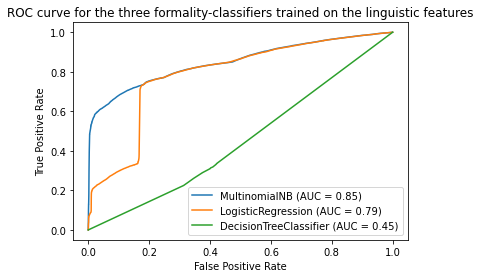

In [12]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(ling_features, label, test_size=0.2, random_state=0)
NB_model = pk.load(open('model/linguistic_stats_NB.pk','rb'))
LR_model = pk.load(open('model/linguistic_stats_LR.pk','rb'))
DT_model = pk.load(open('model/linguistic_stats_DT.pk','rb'))

fig, axes = plt.subplots()
metrics.plot_roc_curve(NB_model, X_test, y_test, ax= axes) 
metrics.plot_roc_curve(LR_model, X_test, y_test, ax = axes) 
metrics.plot_roc_curve(DT_model, X_test, y_test, ax = axes) 

plt.title('ROC curve for the three formality-classifiers trained on the linguistic features')
plt.show()